## Amazon Delivery Time Prediction - Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Order_to_Pickup_Minutes,Order_Day,Order_DayName,Order_Month
0,37,4.9,Sunny,High,motorcycle,Urban,120.0,Clothing,3.020737,15.0,19,Saturday,3
1,34,4.5,Stormy,Jam,scooter,Metropolitian,165.0,Electronics,20.143737,5.0,25,Friday,3
2,23,4.4,Sandstorms,Low,motorcycle,Urban,130.0,Sports,1.549693,15.0,19,Saturday,3
3,38,4.7,Sunny,Medium,motorcycle,Metropolitian,105.0,Cosmetics,7.774497,10.0,5,Tuesday,4
4,32,4.6,Cloudy,High,scooter,Metropolitian,150.0,Toys,6.197898,15.0,26,Saturday,3


### Analyze delivery time distributions and patterns

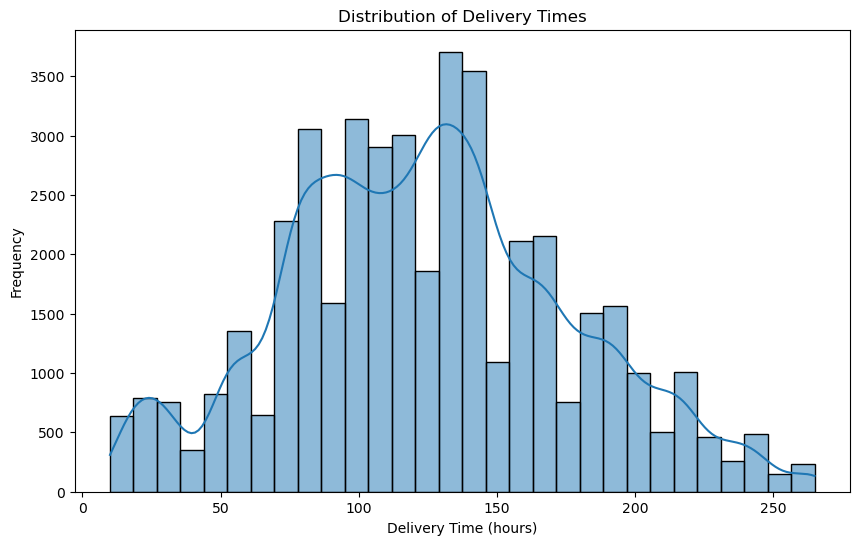

In [5]:
# Delivery time distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_Time'], kde=True, bins=30)
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (hours)')
plt.ylabel('Frequency')
plt.show()

**Observation:**
1. The distribution appears to be slightly right-skewed.
2. The majority of delivery times fall between 100 and 150 hours, where the frequency is the highest.
3. Delivery times range from 0 to about 260 hours.

([0, 1, 2, 3],
 [Text(0, 0, 'motorcycle '),
  Text(1, 0, 'scooter '),
  Text(2, 0, 'van'),
  Text(3, 0, 'bicycle ')])

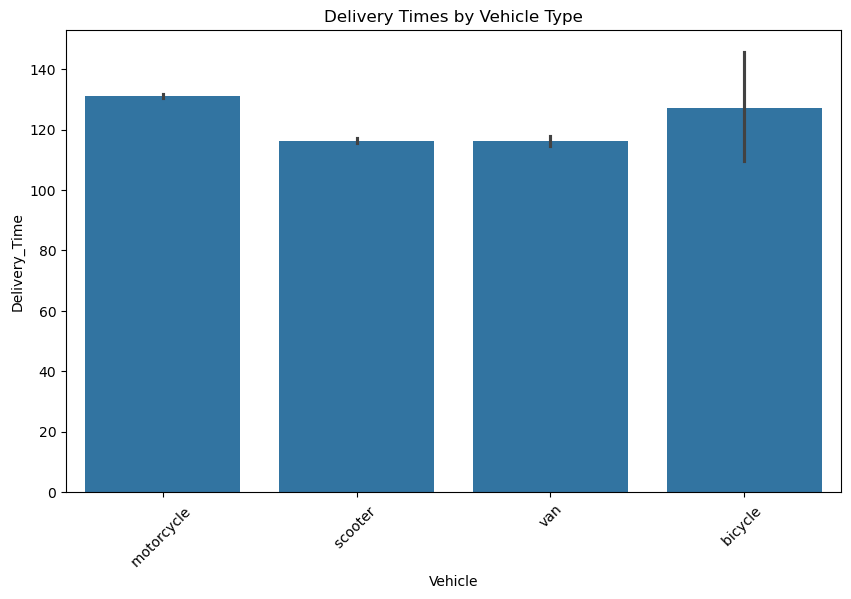

In [17]:
# Box plot of delivery times by vehicle
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle', y='Delivery_Time', data=df)
plt.title('Delivery Times by Vehicle Type')
plt.xticks(rotation=45)

**Observation:**
1. Motorcycles have the highest average delivery time (~130 mins) with low variation.
2. Scooters and vans show the lowest and most consistent delivery times (~116 mins).
3. Bicycles have moderate delivery time (~127 mins) but show the highest variability, indicating inconsistency in delivery performance.
4. Overall, scooters and vans appear to be the most efficient and reliable delivery options.

### Analyze impact of weather and traffic on delivery times

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Sunny'),
  Text(1, 0, 'Stormy'),
  Text(2, 0, 'Sandstorms'),
  Text(3, 0, 'Cloudy'),
  Text(4, 0, 'Fog'),
  Text(5, 0, 'Windy')])

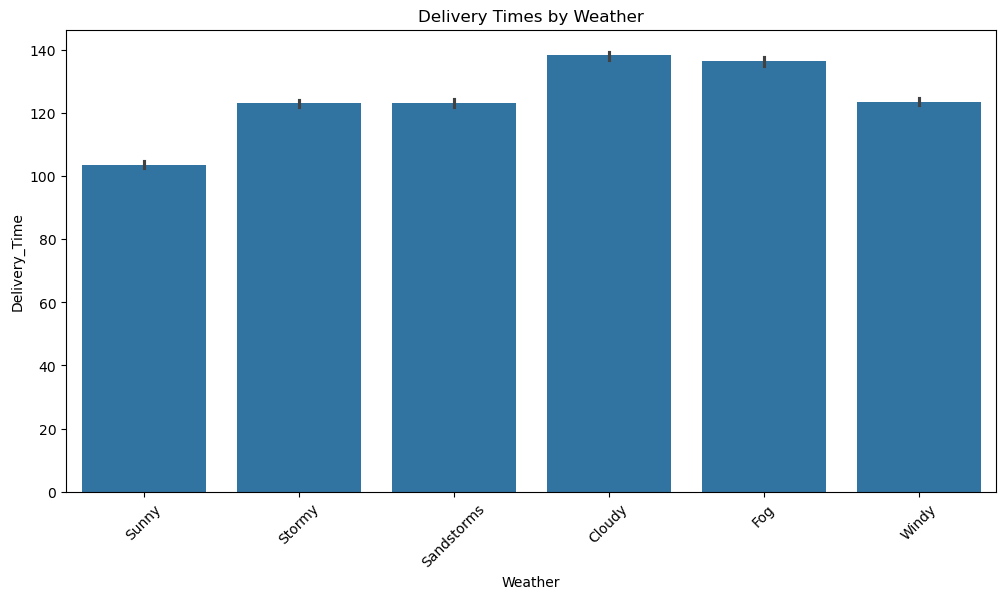

In [9]:
# Weather impact

plt.figure(figsize=(12, 6))
sns.barplot(x='Weather', y='Delivery_Time', data=df)
plt.title('Delivery Times by Weather')
plt.xticks(rotation=45)

**Observation:**
1. Sunny weather leads to the fastest deliveries (~104 minutes).
2. Cloudy and foggy conditions result in the longest delivery times (~137–138 minutes).
3. Stormy, sandstorm, and windy weather show moderate delivery times (~123–125 minutes).
4. Insight: Adverse weather (especially fog and clouds) significantly slows down deliveries, while sunny conditions ensure quicker and more efficient delivery performance.

Text(0.5, 1.0, 'Delivery Times by Traffic')

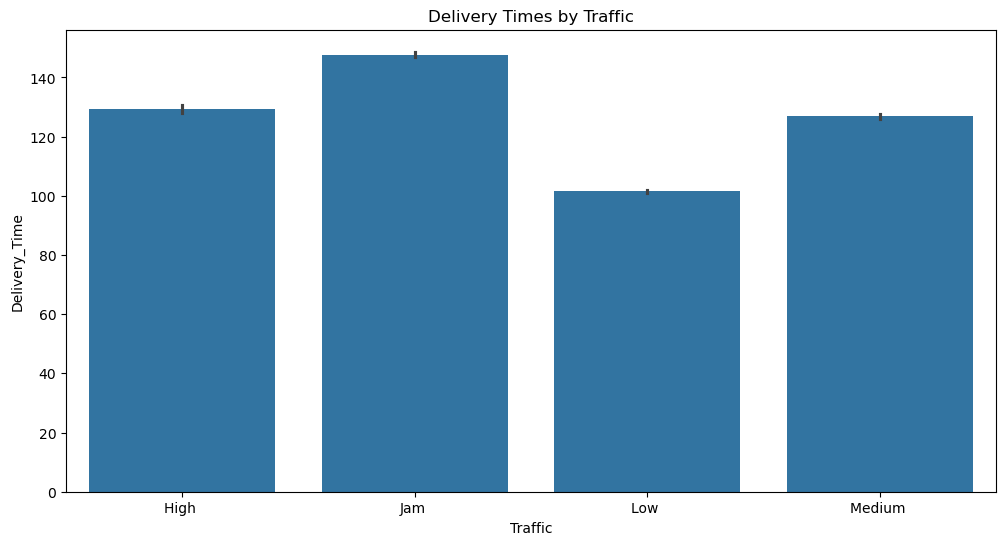

In [11]:
# Traffic impact

plt.figure(figsize=(12, 6))
sns.barplot(x='Traffic', y='Delivery_Time', data=df)
plt.title('Delivery Times by Traffic')

**Observation:**
1. Traffic Jam leads to the longest delivery time (~148 minutes).
2. Low traffic results in the fastest delivery (~102 minutes).
3. High and Medium traffic have moderate delivery times (~127–130 minutes).
4. Insight: As expected, heavier traffic—especially traffic jams—significantly delays deliveries, while low traffic ensures faster delivery times.

Text(0.5, 1.0, 'Delivery Times by Area')

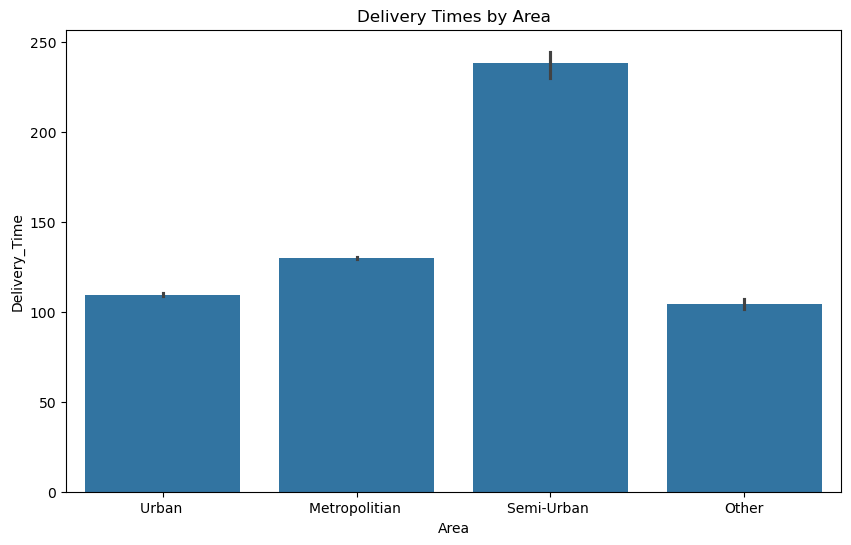

In [13]:
# Area impact
plt.figure(figsize=(10, 6))
sns.barplot(x='Area', y='Delivery_Time', data=df)
plt.title('Delivery Times by Area')

**Observation:**
1. Semi-Urban areas have the highest median delivery time (around 250-260).
2. Metropolitan areas show lower median delivery time (around 120-130).
3. Urban and Other areas have similar median delivery times, falling between Metropolitan and Semi-Urban.
4. Urban and Other areas have several identified outliers on the higher end, indicating unusually long delivery times.
5. Semi-Urban areas have a few outliers on the lower end, suggesting unusually short delivery times

### Analyze correlations between numerical variables

Text(0.5, 1.0, 'Correlation Matrix of Numerical Variables')

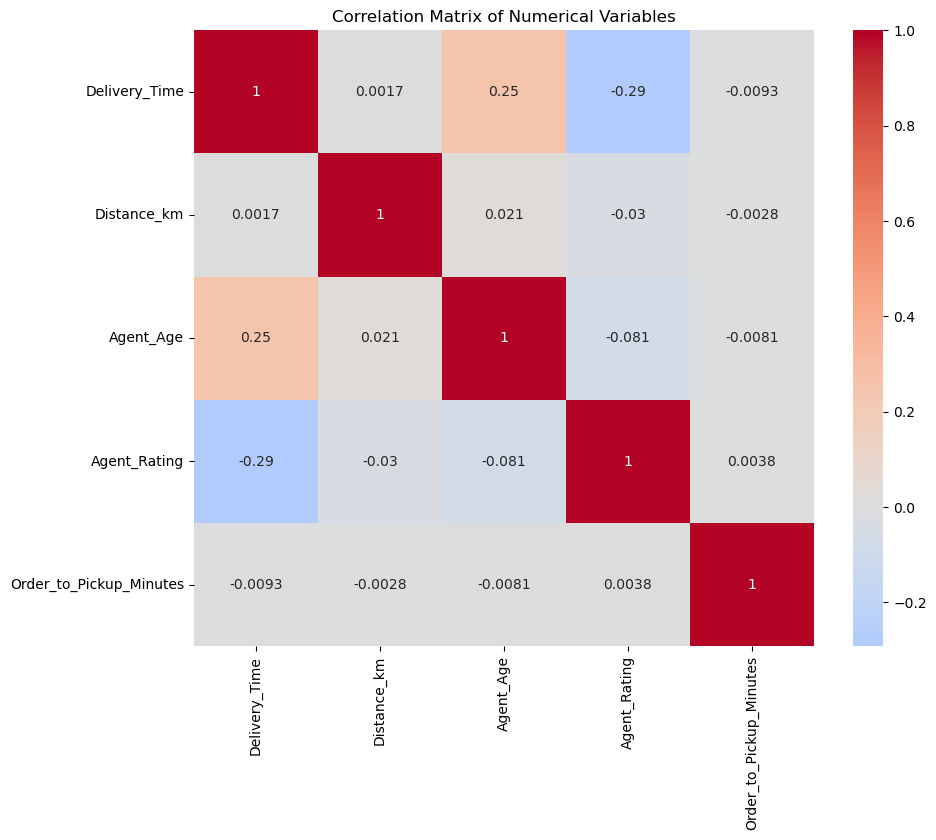

In [28]:
# Select numerical columns
numerical_cols = ['Delivery_Time', 'Distance_km', 'Agent_Age', 'Agent_Rating', 'Order_to_Pickup_Minutes']
    
# Create correlation matrix
corr_matrix = df[numerical_cols].corr()
    
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')